## GEORGE KIBIWOT
## P101/0008G/20
### AI PROGRAMMING ASSINGMENT 1

### Adversarial Search: Minimax and Alpha-Beta Pruning

#### 1.	Tic-Tac-Toe AI Using Minimax Algorithm with Visualization

In [ ]:
import tkinter as tk
from tkinter import messagebox

# Define constants
PLAYER_X = "X"
PLAYER_O = "O"


class TicTacToe:
    def __init__(self, master):
        self.master = master
        self.master.title("Tic-Tac-Toe")
        self.board = [""] * 9  # 3x3 board initialized with empty strings
        self.current_player = PLAYER_X

        self.buttons = [tk.Button(master, text="", font=('Arial', 20), width=5, height=2,
                                  command=lambda i=i: self.player_move(i)) for i in range(9)]

        for i, button in enumerate(self.buttons):
            button.grid(row=i // 3, column=i % 3)

    def player_move(self, i):
        if self.board[i] == "" and self.current_player == PLAYER_X:
            self.board[i] = PLAYER_X
            self.buttons[i].config(text=PLAYER_X)
            if self.check_winner(PLAYER_X):
                messagebox.showinfo("Game Over", "Player X wins!")
                self.reset_game()
            elif "" not in self.board:
                messagebox.showinfo("Game Over", "It's a draw!")
                self.reset_game()
            else:
                self.current_player = PLAYER_O
                self.ai_move()

    def ai_move(self):
        best_score = float("-inf")
        best_move = None
        for i in range(9):
            if self.board[i] == "":
                self.board[i] = PLAYER_O
                score = self.minimax(self.board, 0, False)
                self.board[i] = ""
                if score > best_score:
                    best_score = score
                    best_move = i

        if best_move is not None:
            self.board[best_move] = PLAYER_O
            self.buttons[best_move].config(text=PLAYER_O)
            if self.check_winner(PLAYER_O):
                messagebox.showinfo("Game Over", "Player O wins!")
                self.reset_game()
            elif "" not in self.board:
                messagebox.showinfo("Game Over", "It's a draw!")
                self.reset_game()
            else:
                self.current_player = PLAYER_X

    def minimax(self, board, depth, is_maximizing):
        scores = {PLAYER_X: -1, PLAYER_O: 1, "draw": 0}

        winner = self.check_winner(PLAYER_O)
        if winner:
            return scores[PLAYER_O]
        winner = self.check_winner(PLAYER_X)
        if winner:
            return scores[PLAYER_X]
        if "" not in board:
            return scores["draw"]

        if is_maximizing:
            best_score = float("-inf")
            for i in range(9):
                if board[i] == "":
                    board[i] = PLAYER_O
                    score = self.minimax(board, depth + 1, False)
                    board[i] = ""
                    best_score = max(score, best_score)
            return best_score
        else:
            best_score = float("inf")
            for i in range(9):
                if board[i] == "":
                    board[i] = PLAYER_X
                    score = self.minimax(board, depth + 1, True)
                    board[i] = ""
                    best_score = min(score, best_score)
            return best_score

    def check_winner(self, player):
        winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),
                                (0, 3, 6), (1, 4, 7), (2, 5, 8),
                                (0, 4, 8), (2, 4, 6)]

        for combo in winning_combinations:
            if all(self.board[i] == player for i in combo):
                return True
        return False

    def reset_game(self):
        self.board = [""] * 9
        for button in self.buttons:
            button.config(text="")
        self.current_player = PLAYER_X


if __name__ == "__main__":
    root = tk.Tk()
    game = TicTacToe(root)
    root.mainloop()


#### 2.	Connect-4 Game Using Minimax with Alpha-Beta Pruning

In [ ]:
import tkinter as tk

# Constants
BOARD_SIZE = 8
EMPTY, BLACK, WHITE, BLACK_KING, WHITE_KING = 0, 1, 2, 3, 4
DEPTH = 3  # Depth for Minimax

class CheckersAI:
    def __init__(self):
        self.board = self.create_initial_board()
        self.window = tk.Tk()
        self.window.title("Checkers AI with Minimax and Alpha-Beta Pruning")
        
        self.selected_piece = None  # To store the selected piece
        self.board_frame = tk.Frame(self.window)
        self.board_frame.grid(row=0, column=0)
        
        self.create_board()
        self.update_board()
        
        self.window.mainloop()

    def create_initial_board(self):
        """Initialize the board with the starting positions for Checkers."""
        board = [[EMPTY for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
        for row in range(3):
            for col in range(BOARD_SIZE):
                if (row + col) % 2 == 1:
                    board[row][col] = BLACK
        for row in range(5, BOARD_SIZE):
            for col in range(BOARD_SIZE):
                if (row + col) % 2 == 1:
                    board[row][col] = WHITE
        return board

    def create_board(self):
        """Create the checkers board using Tkinter buttons."""
        self.buttons = [[None for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                button = tk.Button(self.board_frame, text="", width=4, height=2, font=("Arial", 20),
                                   command=lambda r=row, c=col: self.player_move(r, c))
                button.grid(row=row, column=col)
                self.buttons[row][col] = button

    def update_board(self):
        """Update the board display in the GUI."""
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                piece = self.get_piece_at(row, col)
                self.buttons[row][col].config(text=piece)
                # Reset background color
                self.buttons[row][col].config(bg="white" if (row + col) % 2 == 0 else "lightgrey")

    def get_piece_at(self, row, col):
        """Get the piece at a given board position."""
        piece_map = {BLACK: "B", WHITE: "W", BLACK_KING: "BK", WHITE_KING: "WK"}
        piece = self.board[row][col]
        return piece_map.get(piece, "")

    def player_move(self, row, col):
        """Handle player's move input."""
        if self.selected_piece:  # If a piece is selected
            from_row, from_col = self.selected_piece
            if self.board[row][col] == EMPTY:  # Move to an empty square
                self.make_move(from_row, from_col, row, col)
                self.selected_piece = None  # Deselect after moving
                self.update_board()
                # After player's move, AI takes its turn
                self.ai_move()
            else:
                # Reset selection if clicking on a non-empty square
                self.selected_piece = None
        else:
            if self.board[row][col] in [WHITE, WHITE_KING]:  # Select only white pieces
                self.selected_piece = (row, col)  # Store selected piece position
                self.highlight_moves()

    def make_move(self, from_row, from_col, to_row, to_col):
        """Make the move and promote the piece if needed."""
        self.board[to_row][to_col] = self.board[from_row][from_col]
        self.board[from_row][from_col] = EMPTY
        
        # Check for promotion to king
        if to_row == 0 and self.board[to_row][to_col] == WHITE:
            self.board[to_row][to_col] = WHITE_KING
        elif to_row == BOARD_SIZE - 1 and self.board[to_row][to_col] == BLACK:
            self.board[to_row][to_col] = BLACK_KING

    def highlight_moves(self):
        """Highlight possible moves for the selected piece."""
        if self.selected_piece:
            row, col = self.selected_piece
            legal_moves = self.get_legal_moves(self.board, True)  # Assuming player is white
            for move in legal_moves:
                to_row, to_col = move[2], move[3]
                self.buttons[to_row][to_col].config(bg="yellow")  # Highlight possible moves

    def reset_highlights(self):
        """Reset the color of all buttons back to default."""
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                piece = self.get_piece_at(row, col)
                self.buttons[row][col].config(bg="white" if piece == "" else "lightgrey")

    def ai_move(self):
        """AI makes a move using Minimax with Alpha-Beta pruning."""
        best_move = self.minimax(self.board, DEPTH, True, float("-inf"), float("inf"))[1]
        if best_move:
            from_row, from_col, to_row, to_col = best_move
            self.make_move(from_row, from_col, to_row, to_col)
            self.update_board()

    def minimax(self, board, depth, maximizing, alpha, beta):
        """Minimax algorithm with Alpha-Beta pruning."""
        if depth == 0 or self.is_game_over(board):
            return self.evaluate_board(board), None

        legal_moves = self.get_legal_moves(board, maximizing)
        if maximizing:
            max_eval = float("-inf")
            best_move = None
            for move in legal_moves:
                new_board = self.make_move_copy(board, move)
                eval = self.minimax(new_board, depth - 1, False, alpha, beta)[0]
                if eval > max_eval:
                    max_eval = eval
                    best_move = move
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break  # Alpha-beta pruning
            return max_eval, best_move
        else:
            min_eval = float("inf")
            best_move = None
            for move in legal_moves:
                new_board = self.make_move_copy(board, move)
                eval = self.minimax(new_board, depth - 1, True, alpha, beta)[0]
                if eval < min_eval:
                    min_eval = eval
                    best_move = move
                beta = min(beta, eval)
                if beta <= alpha:
                    break  # Alpha-beta pruning
            return min_eval, best_move

    def evaluate_board(self, board):
        """Evaluate the board position for Minimax."""
        eval = 0
        piece_values = {BLACK: -1, WHITE: 1, BLACK_KING: -2, WHITE_KING: 2}
        for row in board:
            for piece in row:
                eval += piece_values.get(piece, 0)
        return eval

    def is_game_over(self, board):
        """Determine if the game is over."""
        white_pieces = sum(row.count(WHITE) + row.count(WHITE_KING) for row in board)
        black_pieces = sum(row.count(BLACK) + row.count(BLACK_KING) for row in board)
        return white_pieces == 0 or black_pieces == 0

    def get_legal_moves(self, board, maximizing):
        """Get all legal moves for the current player."""
        legal_moves = []
        if maximizing:
            player_piece = WHITE
            king_piece = WHITE_KING
            move_directions = [(1, 1), (1, -1)]
        else:
            player_piece = BLACK
            king_piece = BLACK_KING
            move_directions = [(-1, 1), (-1, -1)]

        # Kings can move in all four directions
        move_directions += [(-1, 1), (-1, -1), (1, 1), (1, -1)]

        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                if board[row][col] in [player_piece, king_piece]:
                    for dr, dc in move_directions:
                        new_row, new_col = row + dr, col + dc
                        if 0 <= new_row < BOARD_SIZE and 0 <= new_col < BOARD_SIZE and board[new_row][new_col] == EMPTY:
                            legal_moves.append((row, col, new_row, new_col))
                        # Check for jump moves (capture opponent)
                        jump_row, jump_col = row + 2 * dr, col + 2 * dc
                        if (0 <= jump_row < BOARD_SIZE and 0 <= jump_col < BOARD_SIZE and
                            board[new_row][new_col] in [BLACK, BLACK_KING] and
                            board[jump_row][jump_col] == EMPTY):
                            legal_moves.append((row, col, jump_row, jump_col))
        return legal_moves

    def make_move_copy(self, board, move):
        """Create a copy of the board and make a move on it."""
        new_board = [row[:] for row in board]  # Deep copy
        from_row, from_col, to_row, to_col = move
        new_board[to_row][to_col] = new_board[from_row][from_col]
        new_board[from_row][from_col] = EMPTY
        return new_board

# Start the game
if __name__ == "__main__":
    CheckersAI()


#### 3.	Chess AI Using Minimax with Alpha-Beta Pruning Visualization

In [8]:
pip install python-chess

Note: you may need to restart the kernel to use updated packages.


In [28]:
import tkinter as tk

# Constants
BOARD_SIZE = 8
EMPTY, BLACK, WHITE, BLACK_KING, WHITE_KING = 0, 1, 2, 3, 4
DEPTH = 3  # Depth for Minimax

class CheckersAI:
    def __init__(self):
        self.board = self.create_initial_board()
        self.window = tk.Tk()
        self.window.title("Checkers AI with Minimax and Alpha-Beta Pruning")
        
        self.board_frame = tk.Frame(self.window)
        self.board_frame.grid(row=0, column=0)
        
        self.create_board()
        self.update_board()
        
        self.window.mainloop()

    def create_initial_board(self):
        """Initialize the board with the starting positions for Checkers."""
        board = [[EMPTY for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
        for row in range(3):
            for col in range(BOARD_SIZE):
                if (row + col) % 2 == 1:
                    board[row][col] = BLACK
        for row in range(5, BOARD_SIZE):
            for col in range(BOARD_SIZE):
                if (row + col) % 2 == 1:
                    board[row][col] = WHITE
        return board

    def create_board(self):
        """Create the checkers board using Tkinter buttons."""
        self.buttons = [[None for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                button = tk.Button(self.board_frame, text="", width=4, height=2, font=("Arial", 20),
                                   command=lambda r=row, c=col: self.player_move(r, c))
                button.grid(row=row, column=col)
                self.buttons[row][col] = button

    def update_board(self):
        """Update the board display in the GUI."""
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                piece = self.get_piece_at(row, col)
                self.buttons[row][col].config(text=piece)

    def get_piece_at(self, row, col):
        """Get the piece at a given board position."""
        piece_map = {BLACK: "B", WHITE: "W", BLACK_KING: "BK", WHITE_KING: "WK"}
        piece = self.board[row][col]
        return piece_map.get(piece, "")

    def player_move(self, row, col):
        """Handle player's move input."""
        if self.board[row][col] == EMPTY:  # Only allow moves to empty spaces
            self.board[row][col] = WHITE  # For demo purposes, assume player moves a white piece here
            self.update_board()
            # After player's move, AI takes its turn
            self.ai_move()

    def ai_move(self):
        """AI makes a move using Minimax with Alpha-Beta pruning."""
        evaluated_moves = []  # To track evaluated moves
        best_move = self.minimax(self.board, DEPTH, True, float("-inf"), float("inf"), evaluated_moves)[1]
        if best_move:
            # Perform the best move on the board
            from_row, from_col, to_row, to_col = best_move
            self.board[to_row][to_col] = self.board[from_row][from_col]
            self.board[from_row][from_col] = EMPTY
            self.update_board()

    def minimax(self, board, depth, maximizing, alpha, beta, evaluated_moves):
        """Minimax algorithm with Alpha-Beta pruning."""
        if depth == 0 or self.is_game_over(board):
            return self.evaluate_board(board), None

        legal_moves = self.get_legal_moves(board, maximizing)
        if maximizing:
            max_eval = float("-inf")
            best_move = None
            for move in legal_moves:
                new_board = self.make_move(board, move)
                eval = self.minimax(new_board, depth - 1, False, alpha, beta, evaluated_moves)[0]
                evaluated_moves.append(move)  # Track evaluated moves
                print(f"Evaluating move {move}: {eval}")  # Log evaluated moves
                if eval > max_eval:
                    max_eval = eval
                    best_move = move
                alpha = max(alpha, eval)
                if beta <= alpha:
                    self.highlight_move(move, pruned=True)
                    break  # Alpha-beta pruning
            return max_eval, best_move
        else:
            min_eval = float("inf")
            best_move = None
            for move in legal_moves:
                new_board = self.make_move(board, move)
                eval = self.minimax(new_board, depth - 1, True, alpha, beta, evaluated_moves)[0]
                evaluated_moves.append(move)  # Track evaluated moves
                print(f"Evaluating move {move}: {eval}")  # Log evaluated moves
                if eval < min_eval:
                    min_eval = eval
                    best_move = move
                beta = min(beta, eval)
                if beta <= alpha:
                    self.highlight_move(move, pruned=True)
                    break  # Alpha-beta pruning
            return min_eval, best_move

    def evaluate_board(self, board):
        """Evaluate the board position for Minimax."""
        eval = 0
        piece_values = {BLACK: -1, WHITE: 1, BLACK_KING: -2, WHITE_KING: 2}
        for row in board:
            for piece in row:
                eval += piece_values.get(piece, 0)
        return eval

    def is_game_over(self, board):
        """Determine if the game is over."""
        white_pieces = sum(row.count(WHITE) + row.count(WHITE_KING) for row in board)
        black_pieces = sum(row.count(BLACK) + row.count(BLACK_KING) for row in board)
        return white_pieces == 0 or black_pieces == 0

    def get_legal_moves(self, board, maximizing):
        """Get all legal moves for the current player."""
        legal_moves = []
        
        # Normal white pieces move forward diagonally
        if maximizing:
            player_piece = WHITE
            king_piece = WHITE_KING
            move_directions = [(1, 1), (1, -1)]  
        else:
            player_piece = BLACK
            king_piece = BLACK_KING
            move_directions = [(-1, 1), (-1, -1)]  # Normal black pieces move backward diagonally

        # Kings can move in all four directions
        move_directions += [(-1, 1), (-1, -1), (1, 1), (1, -1)]

        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                if board[row][col] in [player_piece, king_piece]:
                    for dr, dc in move_directions:
                        new_row, new_col = row + dr, col + dc
                        if 0 <= new_row < BOARD_SIZE and 0 <= new_col < BOARD_SIZE and board[new_row][new_col] == EMPTY:
                            legal_moves.append((row, col, new_row, new_col))
                        # Check for jump moves (capture opponent)
                        jump_row, jump_col = row + 2 * dr, col + 2 * dc
                        if (0 <= jump_row < BOARD_SIZE and 0 <= jump_col < BOARD_SIZE and
                            board[new_row][new_col] in [BLACK, BLACK_KING, WHITE, WHITE_KING] and
                            board[jump_row][jump_col] == EMPTY):
                            legal_moves.append((row, col, jump_row, jump_col))
        return legal_moves

    def make_move(self, board, move):
        """Return a new board state after making a move."""
        from_row, from_col, to_row, to_col = move
        if to_row < 0 or to_row >= BOARD_SIZE or to_col < 0 or to_col >= BOARD_SIZE:
            raise IndexError("Move out of bounds")  # Boundary check
        new_board = [row[:] for row in board]
        new_board[to_row][to_col] = new_board[from_row][from_col]
        new_board[from_row][from_col] = EMPTY
        return new_board

    def highlight_move(self, move, pruned=False):
        """Highlight the move in the GUI, indicating if it's pruned."""
        from_row, from_col, to_row, to_col = move
        color = "red" if pruned else "green"
        
        # Highlight the source and destination squares
        self.buttons[from_row][from_col].config(bg=color)
        self.buttons[to_row][to_col].config(bg=color)
        
        # After a brief moment, reset the colors
        self.window.after(500, lambda: self.reset_highlights())

    def reset_highlights(self):
        """Reset the color of all buttons back to default."""
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                piece = self.get_piece_at(row, col)
                self.buttons[row][col].config(bg="white" if piece == "" else "lightgrey")

if __name__ == "__main__":
    CheckersAI()


Evaluating move (4, 7, 3, 6): 1
Evaluating move (5, 0, 4, 1): 1
Evaluating move (5, 2, 4, 3): 1
Evaluating move (5, 2, 4, 1): 1
Evaluating move (5, 4, 4, 5): 1
Evaluating move (5, 4, 4, 3): 1
Evaluating move (5, 6, 4, 5): 1
Evaluating move (6, 1, 4, 3): 1
Evaluating move (6, 3, 4, 5): 1
Evaluating move (6, 3, 4, 1): 1
Evaluating move (6, 5, 4, 3): 1
Evaluating move (6, 7, 4, 5): 1
Evaluating move (1, 0, 3, 2): 1
Evaluating move (4, 7, 3, 6): 1
Evaluating move (1, 2, 3, 4): 1
Evaluating move (4, 7, 3, 6): 1
Evaluating move (1, 2, 3, 0): 1
Evaluating move (5, 0, 4, 1): 1
Evaluating move (1, 4, 3, 6): 1
Evaluating move (4, 7, 3, 6): 1
Evaluating move (1, 4, 3, 2): 1
Evaluating move (4, 7, 3, 6): 1
Evaluating move (1, 6, 3, 4): 1
Evaluating move (4, 7, 3, 6): 1
Evaluating move (2, 1, 3, 2): 1
Evaluating move (4, 7, 3, 6): 1
Evaluating move (2, 1, 3, 0): 1
Evaluating move (4, 7, 3, 6): 1
Evaluating move (2, 3, 3, 4): 1
Evaluating move (4, 7, 3, 6): 1
Evaluating move (2, 3, 3, 2): 1
Evaluati

#### 4.	Checkers AI with Minimax and Visualized Move Evaluation

In [25]:
import tkinter as tk
import random

# Constants
BOARD_SIZE = 8
EMPTY, BLACK, WHITE, BLACK_KING, WHITE_KING = 0, 1, 2, 3, 4
DEPTH = 3  # Depth for Minimax

class CheckersAI:
    def __init__(self):
        self.board = self.create_initial_board()
        self.window = tk.Tk()
        self.window.title("Checkers AI with Minimax and Alpha-Beta Pruning")
        
        self.board_frame = tk.Frame(self.window)
        self.board_frame.grid(row=0, column=0)
        
        self.create_board()
        self.update_board()
        
        self.window.mainloop()

    def create_initial_board(self):
        """Initialize the board with the starting positions for Checkers."""
        board = [[EMPTY for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
        for row in range(3):
            for col in range(BOARD_SIZE):
                if (row + col) % 2 == 1:
                    board[row][col] = BLACK
        for row in range(5, BOARD_SIZE):
            for col in range(BOARD_SIZE):
                if (row + col) % 2 == 1:
                    board[row][col] = WHITE
        return board

    def create_board(self):
        """Create the checkers board using Tkinter buttons."""
        self.buttons = [[None for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                button = tk.Button(self.board_frame, text="", width=4, height=2, font=("Arial", 20),
                                   command=lambda r=row, c=col: self.player_move(r, c))
                button.grid(row=row, column=col)
                self.buttons[row][col] = button

    def update_board(self):
        """Update the board display in the GUI."""
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                piece = self.get_piece_at(row, col)
                self.buttons[row][col].config(text=piece)

    def get_piece_at(self, row, col):
        """Get the piece at a given board position."""
        piece_map = {BLACK: "B", WHITE: "W", BLACK_KING: "BK", WHITE_KING: "WK"}
        piece = self.board[row][col]
        return piece_map.get(piece, "")

    def player_move(self, row, col):
        """Handle player's move input."""
        # Simple player move handling
        if self.board[row][col] == EMPTY:  # Only allow moves to empty spaces
            self.board[row][col] = WHITE  # For demo purposes, assume player moves a white piece here
            self.update_board()
            # After player's move, AI takes its turn
            self.ai_move()

    def ai_move(self):
        """AI makes a move using Minimax with Alpha-Beta pruning."""
        evaluated_moves = []  # To track evaluated moves
        best_move = self.minimax(self.board, DEPTH, True, float("-inf"), float("inf"), evaluated_moves)[1]
        if best_move:
            # Perform the best move on the board
            from_row, from_col, to_row, to_col = best_move
            self.board[to_row][to_col] = self.board[from_row][from_col]
            self.board[from_row][from_col] = EMPTY
            self.update_board()

    def minimax(self, board, depth, maximizing, alpha, beta, evaluated_moves):
        """Minimax algorithm with Alpha-Beta pruning."""
        if depth == 0 or self.is_game_over(board):
            return self.evaluate_board(board), None

        legal_moves = self.get_legal_moves(board, maximizing)
        if maximizing:
            max_eval = float("-inf")
            best_move = None
            for move in legal_moves:
                new_board = self.make_move(board, move)
                eval = self.minimax(new_board, depth - 1, False, alpha, beta, evaluated_moves)[0]
                evaluated_moves.append(move)  # Track evaluated moves
                print(f"Evaluating move {move}: {eval}")  # Log evaluated moves
                if eval > max_eval:
                    max_eval = eval
                    best_move = move
                alpha = max(alpha, eval)
                if beta <= alpha:
                    self.highlight_move(move, pruned=True)
                    break  # Alpha-beta pruning
            return max_eval, best_move
        else:
            min_eval = float("inf")
            best_move = None
            for move in legal_moves:
                new_board = self.make_move(board, move)
                eval = self.minimax(new_board, depth - 1, True, alpha, beta, evaluated_moves)[0]
                evaluated_moves.append(move)  # Track evaluated moves
                print(f"Evaluating move {move}: {eval}")  # Log evaluated moves
                if eval < min_eval:
                    min_eval = eval
                    best_move = move
                beta = min(beta, eval)
                if beta <= alpha:
                    self.highlight_move(move, pruned=True)
                    break  # Alpha-beta pruning
            return min_eval, best_move

    def evaluate_board(self, board):
        """Evaluate the board position for Minimax."""
        eval = 0
        piece_values = {BLACK: -1, WHITE: 1, BLACK_KING: -2, WHITE_KING: 2}
        for row in board:
            for piece in row:
                eval += piece_values.get(piece, 0)
        return eval

    def is_game_over(self, board):
        """Determine if the game is over."""
        white_pieces = sum(row.count(WHITE) + row.count(WHITE_KING) for row in board)
        black_pieces = sum(row.count(BLACK) + row.count(BLACK_KING) for row in board)
        return white_pieces == 0 or black_pieces == 0

    def get_legal_moves(self, board, maximizing):
        """Get all legal moves for the current player."""
        legal_moves = []
        
        # Normal white pieces move forward diagonally
        if maximizing:
            player_piece = WHITE
            king_piece = WHITE_KING
            move_directions = [(1, 1), (1, -1)]  
        else:
            player_piece = BLACK
            king_piece = BLACK_KING
            move_directions = [(-1, 1), (-1, -1)]  # Normal black pieces move backward diagonally

        # Kings can move in all four directions
        move_directions += [(-1, 1), (-1, -1), (1, 1), (1, -1)]

        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                if board[row][col] in [player_piece, king_piece]:
                    for dr, dc in move_directions:
                        new_row, new_col = row + dr, col + dc
                        if 0 <= new_row < BOARD_SIZE and 0 <= new_col < BOARD_SIZE and board[new_row][new_col] == EMPTY:
                            legal_moves.append((row, col, new_row, new_col))
                        # Check for jump moves (capture opponent)
                        jump_row, jump_col = row + 2 * dr, col + 2 * dc
                        if (0 <= jump_row < BOARD_SIZE and 0 <= jump_col < BOARD_SIZE and
                            board[new_row][new_col] in [BLACK, BLACK_KING, WHITE, WHITE_KING] and
                            board[jump_row][jump_col] == EMPTY):
                            legal_moves.append((row, col, jump_row, jump_col))
        return legal_moves

    def make_move(self, board, move):
        """Return a new board state after making a move."""
        from_row, from_col, to_row, to_col = move
        if to_row < 0 or to_row >= BOARD_SIZE or to_col < 0 or to_col >= BOARD_SIZE:
            raise IndexError("Move out of bounds")  # Boundary check
        new_board = [row[:] for row in board]
        new_board[to_row][to_col] = new_board[from_row][from_col]
        new_board[from_row][from_col] = EMPTY
        return new_board

    def highlight_move(self, move, pruned=False):
        """Highlight the move in the GUI, indicating if it's pruned."""
        from_row, from_col, to_row, to_col = move
        color = "red" if pruned else "green"
        
        # Highlight the source and destination squares
        self.buttons[from_row][from_col].config(bg=color)
        self.buttons[to_row][to_col].config(bg=color)
        
        # After a brief moment, reset the colors
        self.window.after(500, lambda: self.reset_highlights())

    def reset_highlights(self):
        """Reset the color of all buttons back to default."""
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                piece = self.get_piece_at(row, col)
                self.buttons[row][col].config(bg="SystemButtonFace")  # Default button color

if __name__ == "__main__":
    CheckersAI()


Evaluating move (3, 6, 4, 7): 1
Evaluating move (3, 6, 4, 5): 1
Evaluating move (3, 6, 4, 7): 1
Evaluating move (3, 6, 4, 5): 1
Evaluating move (5, 0, 4, 1): 1
Evaluating move (5, 2, 4, 3): 1
Evaluating move (5, 2, 4, 1): 1
Evaluating move (5, 4, 4, 5): 1
Evaluating move (5, 4, 4, 3): 1
Evaluating move (5, 6, 4, 7): 1
Evaluating move (5, 6, 4, 5): 1
Evaluating move (6, 1, 4, 3): 1
Evaluating move (6, 3, 4, 5): 1
Evaluating move (6, 3, 4, 1): 1
Evaluating move (6, 5, 4, 7): 1
Evaluating move (6, 5, 4, 3): 1
Evaluating move (6, 7, 4, 5): 1
Evaluating move (1, 0, 3, 2): 1
Evaluating move (3, 6, 4, 7): 1
Evaluating move (1, 2, 3, 4): 1
Evaluating move (3, 6, 4, 7): 1
Evaluating move (1, 2, 3, 0): 1
Evaluating move (3, 6, 4, 7): 1
Evaluating move (1, 4, 3, 2): 1
Evaluating move (3, 6, 4, 7): 1
Evaluating move (1, 6, 3, 4): 1
Evaluating move (3, 6, 4, 7): 1
Evaluating move (2, 1, 3, 2): 1
Evaluating move (3, 6, 4, 7): 1
Evaluating move (2, 1, 3, 0): 1
Evaluating move (3, 6, 4, 7): 1
Evaluati

#### 5.	Othello/Reversi AI Using Minimax with Alpha-Beta Pruning

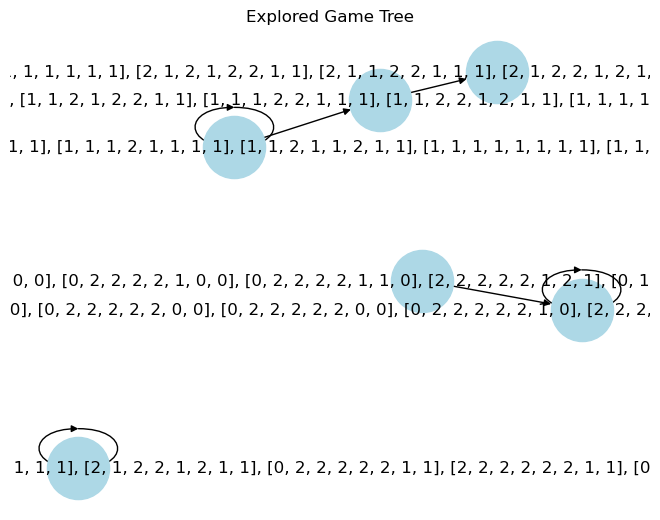

In [23]:
import tkinter as tk
import matplotlib.pyplot as plt
import networkx as nx

# Constants
BOARD_SIZE = 8
EMPTY, BLACK, WHITE = 0, 1, 2
DEPTH = 3  # Depth for Minimax

class OthelloAI:
    def __init__(self):
        self.board = self.create_initial_board()
        self.current_player = BLACK  # Start with black player
        self.window = tk.Tk()
        self.window.title("Othello/Reversi AI with Minimax and Alpha-Beta Pruning")

        self.board_frame = tk.Frame(self.window)
        self.board_frame.grid(row=0, column=0)

        self.create_board()
        self.update_board()

        self.window.mainloop()

    def create_initial_board(self):
        """Initialize the board with the starting positions for Othello."""
        board = [[EMPTY for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
        board[3][3], board[4][4] = WHITE, WHITE
        board[3][4], board[4][3] = BLACK, BLACK
        return board

    def create_board(self):
        """Create the Othello board using Tkinter buttons."""
        self.buttons = [[None for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                button = tk.Button(self.board_frame, text="", width=4, height=2, font=("Arial", 20),
                                   command=lambda r=row, c=col: self.player_move(r, c))
                button.grid(row=row, column=col)
                self.buttons[row][col] = button

    def update_board(self):
        """Update the board display in the GUI."""
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                piece = self.get_piece_at(row, col)
                self.buttons[row][col].config(text=piece)

    def get_piece_at(self, row, col):
        """Get the piece at a given board position."""
        piece_map = {BLACK: "B", WHITE: "W"}
        piece = self.board[row][col]
        return piece_map.get(piece, "")

    def player_move(self, row, col):
        """Handle player's move input."""
        if self.is_valid_move(row, col, self.current_player):
            self.make_move(row, col, self.current_player)
            self.update_board()
            self.current_player = WHITE if self.current_player == BLACK else BLACK  # Switch player
            self.ai_move()

    def is_valid_move(self, row, col, player):
        """Check if a move is valid for the current player."""
        if self.board[row][col] != EMPTY:
            return False

        opponent = WHITE if player == BLACK else BLACK
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            if self.is_on_board(r, c) and self.board[r][c] == opponent:
                while self.is_on_board(r, c) and self.board[r][c] == opponent:
                    r += dr
                    c += dc
                if self.is_on_board(r, c) and self.board[r][c] == player:
                    return True

        return False

    def ai_move(self):
        """AI makes a move using Minimax with Alpha-Beta pruning."""
        best_move = self.minimax(self.board, DEPTH, True, float("-inf"), float("inf"))[1]
        if best_move:
            to_row, to_col = best_move
            self.make_move(to_row, to_col, WHITE)
            self.update_board()
            self.current_player = BLACK  # Switch back to player

            # Visualize the game tree after AI move
            self.visualize_game_tree()

    def visualize_game_tree(self):
        """Visualize the explored game tree."""
        G = nx.DiGraph()
        self.add_nodes_edges(G, self.board, self.current_player, DEPTH)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')
        plt.title("Explored Game Tree")
        plt.show()

    def add_nodes_edges(self, G, board, player, depth):
        """Recursively add nodes and edges to the game tree."""
        if depth == 0:
            return
        
        legal_moves = self.get_legal_moves(board, player)
        for move in legal_moves:
            new_board = [row[:] for row in board]
            self.make_move(move[0], move[1], player)
            G.add_node(str(new_board))  # Add node with board state
            G.add_edge(str(board), str(new_board))  # Add edge from current board to new board
            self.add_nodes_edges(G, new_board, WHITE if player == BLACK else BLACK, depth - 1)
            self.undo_move(new_board, move[0], move[1], player)  # Undo move for further exploration

    def undo_move(self, board, row, col, player):
        """Undo the last move on the board."""
        opponent = WHITE if player == BLACK else BLACK
        board[row][col] = EMPTY  # Remove the piece
        # This is a basic implementation. In a real scenario, you would need to flip the pieces back.

    def minimax(self, board, depth, maximizing, alpha, beta):
        """Minimax algorithm with Alpha-Beta pruning."""
        if depth == 0 or self.is_game_over(board):
            return self.evaluate_board(board), None

        legal_moves = self.get_legal_moves(board, WHITE if maximizing else BLACK)
        if maximizing:
            max_eval = float("-inf")
            best_move = None
            for move in legal_moves:
                new_board = [r[:] for r in board]  # Create a copy of the board
                self.make_move(move[0], move[1], WHITE)  # Apply the move
                eval = self.minimax(new_board, depth - 1, False, alpha, beta)[0]
                if eval > max_eval:
                    max_eval = eval
                    best_move = move
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break  # Alpha-beta pruning
            return max_eval, best_move
        else:
            min_eval = float("inf")
            best_move = None
            for move in legal_moves:
                new_board = [r[:] for r in board]  # Create a copy of the board
                self.make_move(move[0], move[1], BLACK)  # Apply the move
                eval = self.minimax(new_board, depth - 1, True, alpha, beta)[0]
                if eval < min_eval:
                    min_eval = eval
                    best_move = move
                beta = min(beta, eval)
                if beta <= alpha:
                    break  # Alpha-beta pruning
            return min_eval, best_move

    def evaluate_board(self, board):
        """Evaluate the board position for Minimax."""
        eval = 0
        for row in board:
            for piece in row:
                if piece == WHITE:
                    eval += 1
                elif piece == BLACK:
                    eval -= 1
        return eval

    def is_game_over(self, board):
        """Determine if the game is over."""
        return not any(self.get_legal_moves(board, BLACK)) and not any(self.get_legal_moves(board, WHITE))

    def get_legal_moves(self, board, player):
        """Get all legal moves for the current player."""
        legal_moves = []
        opponent = WHITE if player == BLACK else BLACK
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]

        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                if board[row][col] == EMPTY:
                    for dr, dc in directions:
                        r, c = row + dr, col + dc
                        if self.is_on_board(r, c) and board[r][c] == opponent:
                            while self.is_on_board(r, c) and board[r][c] == opponent:
                                r += dr
                                c += dc
                            if self.is_on_board(r, c) and board[r][c] == player:
                                legal_moves.append((row, col))

        return legal_moves

    def is_on_board(self, row, col):
        """Check if the position is on the board."""
        return 0 <= row < BOARD_SIZE and 0 <= col < BOARD_SIZE

    def make_move(self, row, col, player):
        """Update the board state after making a move."""
        self.board[row][col] = player
        opponent = WHITE if player == BLACK else BLACK
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            if self.is_on_board(r, c) and self.board[r][c] == opponent:
                tiles_to_flip = []
                while self.is_on_board(r, c) and self.board[r][c] == opponent:
                    tiles_to_flip.append((r, c))
                    r += dr
                    c += dc
                if self.is_on_board(r, c) and self.board[r][c] == player:
                    for flip_row, flip_col in tiles_to_flip:
                        self.board[flip_row][flip_col] = player

if __name__ == "__main__":
    OthelloAI()
